In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
año_a_cargar = 2024 #Rango desde 2019 hasta 2024
mes_a_cargar = 8 #1-enero, 2-febrero, 3-marzo, ...

In [33]:
def carga_data_air_quality(año_a_cargar, mes_a_cargar):
    '''
        Función que carga datos desde la pagina oficial de nueva york y retorna un dataframe con los datos de calidad de aire
        Recibe año y mes a cargar
        Retorna dataframe con datos cargados
    '''
    try:
        if not (2019 <= año_a_cargar <= 2024) or not (1 <= mes_a_cargar <= 12):
            raise ValueError("El año o mes no está dentro del rango permitido")
    except ValueError as e:
            print(e)
    else:
        #print("El año y mes están dentro del rango permitido")
        url = f"https://azdohv2staticweb.blob.core.windows.net/$web/hist/csv/{año_a_cargar}/{mes_a_cargar}/hourlyMonitoring.csv"
        df = pd.read_csv(url)
    return df

In [34]:
def carga_data_location():
    '''
        Función que carga datos desde la pagina oficial de nueva york y retorna un dataframe con los datos de ubicacion
        Retorna dataframe
    '''
    try:
        if not (2019 <= año_a_cargar <= 2024) or not (1 <= mes_a_cargar <= 12):
            raise ValueError("El año o mes no está dentro del rango permitido")
    except ValueError as e:
            print(e)
    else:
        #print("El año y mes están dentro del rango permitido")
        url = f"https://azdohv2staticweb.blob.core.windows.net/$web/hist/csv/location.csv"
        df = pd.read_csv(url)
    return df

In [35]:
df_location = carga_data_location()

In [36]:
df_location

,SiteID,Latitude,Longitude,SiteName,Address
0,36061NY08454,40.716510,-73.997004,Manhattan Bridge,Canal St SS1E of Elizabeth St
1,36005NY11790,40.819092,-73.885659,Hunts Point,Southeast Corner of Seneca Ave and Longfellow Ave
2,36081NY08198,40.707113,-73.873400,Glendale,Cooper Rapid Rehousing Center - 78-16 Cooper Ave
3,36081NY09285,40.737107,-73.821556,Queens College,Queens College Reference Site
4,36061NY09734,40.750690,-73.987830,Broadway/35th St,Broadway ES1N of 35th St
5,36061NY08653,40.722288,-73.974651,FDR,Southbound FDR access Road between E 10th St a...
6,36005NY11534,40.806486,-73.922487,Mott Haven,North side of E 135th St between Brown Pl and ...
7,36005NY12387,40.845167,-73.906143,Cross Bronx Expy,Cross Bronx Expressway Service road NS1E of Mo...
8,36081NY07615,40.690155,-73.809080,Van Wyck,Northbound Van Wyck Expy access road between 1...
9,36047NY07974,40.702798,-73.960824,BQE,West side of Williamsburg St W between Bedford...


In [37]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SiteID     17 non-null     object 
 1   Latitude   17 non-null     float64
 2   Longitude  17 non-null     float64
 3   SiteName   17 non-null     object 
 4   Address    17 non-null     object 
dtypes: float64(2), object(3)
memory usage: 812.0+ bytes


In [38]:
df = carga_data_air_quality(año_a_cargar, mes_a_cargar)

In [39]:
df

,ID,SiteID,ObservationTimeUTC,Value
0,589310,36061NY10130,2024-08-01 00:00:00.000,9.29
1,589312,36061NY08454,2024-08-01 00:00:00.000,11.07
2,589313,36061NY09734,2024-08-01 00:00:00.000,9.56
3,589315,36061NY08653,2024-08-01 00:00:00.000,9.45
4,589316,36081NY07615,2024-08-01 00:00:00.000,10.40
...,...,...,...,...
8474,609935,36081NY07615,2024-08-31 23:00:00.000,3.73
8475,609936,36085NY03820,2024-08-31 23:00:00.000,4.17
8476,609937,36047NY07974,2024-08-31 23:00:00.000,2.19
8477,609938,36061NY12380,2024-08-31 23:00:00.000,4.31


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8479 entries, 0 to 8478
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8479 non-null   int64  
 1   SiteID              8479 non-null   object 
 2   ObservationTimeUTC  8479 non-null   object 
 3   Value               8479 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 265.1+ KB


In [11]:
df.columns

Index(['ID', 'SiteID', 'ObservationTimeUTC', 'Value'], dtype='object')

In [28]:
df.describe()

,ID,Value
count,8479.000000,8479.000000
mean,601723.955537,9.881217
std,5557.933933,6.244792
min,589310.000000,2.190000
25%,598450.500000,5.440000
50%,602435.000000,8.720000
75%,606231.500000,13.100000
max,609948.000000,265.210000


---
Boxplots
---
---

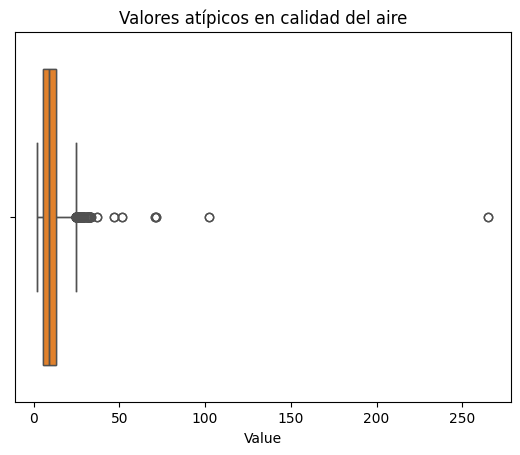

In [41]:
plt.figsize=(16, 4)
sns.boxplot(x = df['Value'])
sns.boxplot(x = "Value", data = df)
plt.title("Valores atípicos en calidad del aire")
plt.show()

- Gran cantiad en presencia de outliers, sin embargo son importantes ya que significan mala calidad del aire
- El limite aproximado es de 30 µg/m3

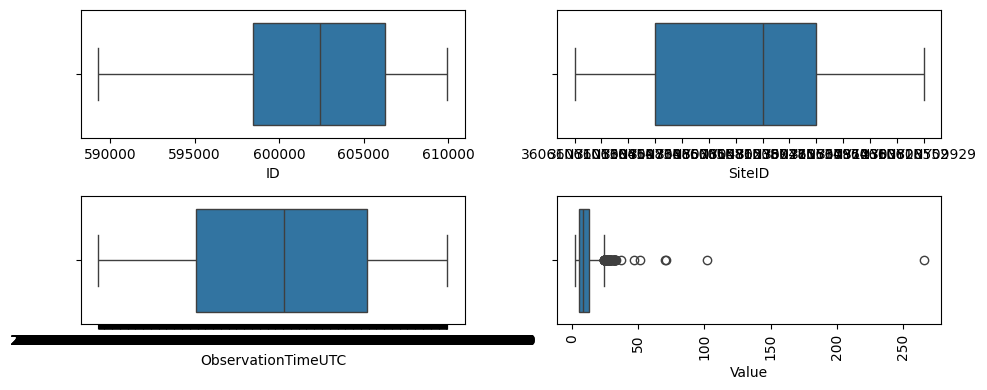

In [22]:
# Configurar la figura con X columnas y Y filas
fig, axes = plt.subplots(2, 2, figsize=(10, 4))

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Crear un boxplot para cada variable
for i, col in enumerate(df.columns[:4]):  # Asegúrate de tener 20 columnas
    sns.boxplot(data=df, x=col, ax=axes[i])
    plt.xticks(rotation=90)
    # axes[i].set_title(col)

# Ajustar el layout para evitar solapamiento
plt.tight_layout()


# Mostrar el gráfico
plt.show()

---
Analisis calidad de aire por día
---
---

Text(0, 0.5, 'Valor')

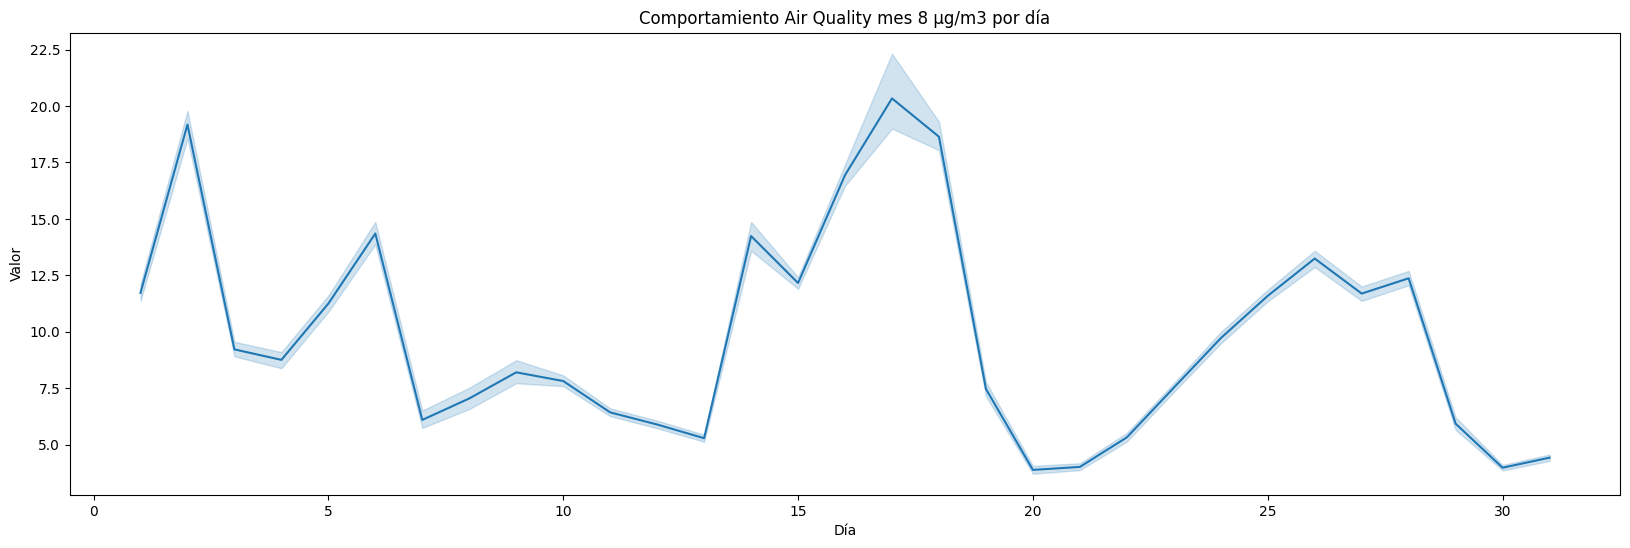

In [51]:
plt.figure(figsize=(20, 6))
df['fecha'] = pd.to_datetime(df['ObservationTimeUTC'])
df['dia'] = df['fecha'].dt.day
sns.lineplot(x='dia', y='Value', data=df)
plt.title(f'Comportamiento Air Quality mes {mes_a_cargar} µg/m3 por día')
plt.xlabel('Día')
plt.ylabel('Valor')

In [45]:
df['Value'].max()

265.21

In [47]:
df['Value'].min()

2.19

In [50]:
df['Value'].mean()

9.881217124660926

- En la ciudad de Nueva York existe un valor maximo de calidad de aire de 265.21 µg/m3
- De igual forma un valor mínimo de 2.19 
- Un valor promedio en todo el periodo de 9.88

---
Analisis calidad de aire por hora
---
---

Text(0, 0.5, 'Valor')

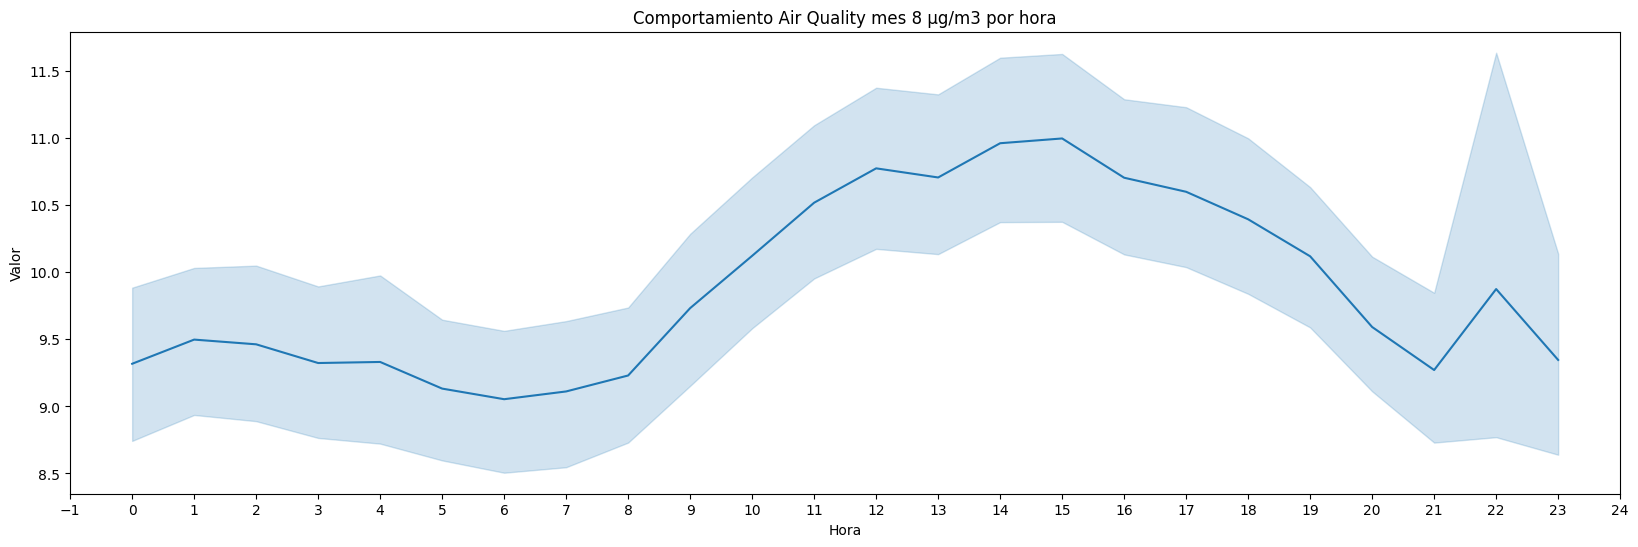

In [56]:
plt.figure(figsize=(20, 6))
df['fecha'] = pd.to_datetime(df['ObservationTimeUTC'])
df['hour'] = df['fecha'].dt.hour
sns.lineplot(x='hour', y='Value', data=df)
plt.title(f'Comportamiento Air Quality mes {mes_a_cargar} µg/m3 por hora')
plt.xticks(range(min(df['hour']), max(df['hour'])+1, 1))
plt.xlim(min(df['hour'])-1, max(df['hour'])+1)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel('Hora')
plt.ylabel('Valor')

Se puede observar que los horarios del día en que existe menor calidad de aire son de 12 a 17 horas

Tabla que muestra rangos de calidad de aire

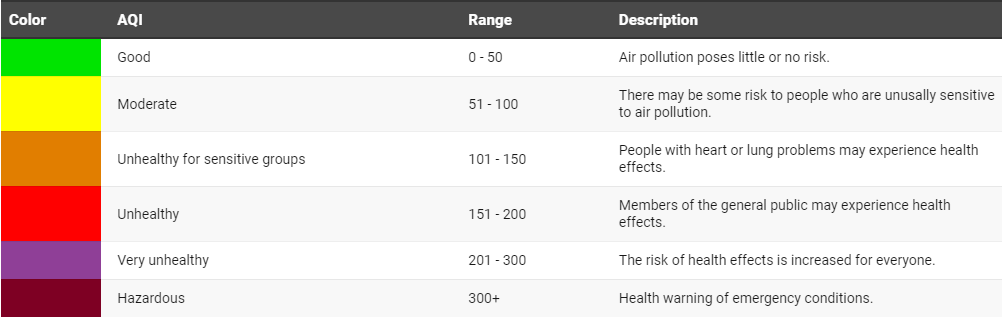